In [3]:
import pandas as pd

In [4]:
#reading excel file in geopanda for Certified Hospital Location in California

data_directory = r"Downloads/" 
clinic_data = pd.read_excel(data_directory +'ARTClinicData_GISClass_CAOnly.xlsx')

# let's list variables in the file
list(clinic_data)

['ClinicID',
 'Address',
 'Long',
 ' Lat',
 'State Code',
 'County Code',
 'Tract Code']

In [5]:
# exploring attribute table 
clinic_data.head(71)

,ClinicID,Address,Long,Lat,State Code,County Code,Tract Code
0,325,"11370 ANDERSON ST, LOMA LINDA, CA, 92354",-117.261140,34.047215,6,71,7302
1,468,"100 PARK PL, SAN RAMON, CA, 94583",-121.990890,37.772377,6,13,345202
2,318,"101 ROWLAND WAY, NOVATO, CA, 94945",-122.558784,38.096916,6,41,101200
3,101,"1060 MARSH RD, MENLO PARK, CA, 94025",-122.184875,37.479930,6,81,611700
4,136,"10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024",-118.444580,34.058598,6,37,265202
...,...,...,...,...,...,...,...
66,521,"1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109",37.786755,-122.422491,6,6075,15100
67,524,"1195 W. Fremont Ave, PALO ALTO, CA, 94087",37.353110,-122.062431,6,6085,510001
68,84,"477 N. El Camino Real, ENCINITAS, CA, 92024",33.057114,-117.261477,6,6073,17108
69,198,"203 N. Brea Blvd, BREA, CA, 92821",33.921864,-117.897953,6,6059,1503


In [36]:
#Check data types using 
print(clinic_data.dtypes)

ClinicID         int64
Address         object
Long           float64
 Lat           float64
State Code       int64
County Code      int64
Tract Code       int64
data_check      object
dtype: object


In [18]:
#checking for missing values
clinic_data.count()

ClinicID       71
Address        71
Long           71
 Lat           71
State Code     71
County Code    71
Tract Code     71
dtype: int64

In [34]:
#checking for null values
print(clinic_data.isnull().sum())

ClinicID       0
Address        0
Long           0
 Lat           0
State Code     0
County Code    0
Tract Code     0
data_check     0
dtype: int64


In [7]:
#checking for null values
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ClinicID     71 non-null     int64  
 1   Address      71 non-null     object 
 2   Long         71 non-null     float64
 3    Lat         71 non-null     float64
 4   State Code   71 non-null     int64  
 5   County Code  71 non-null     int64  
 6   Tract Code   71 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 4.0+ KB


In [31]:
#summary statistics for all the numeric data types
print(clinic_data.describe())

         ClinicID        Long         Lat  State Code  County Code  \
count   71.000000   71.000000   71.000000        71.0    71.000000   
mean   336.985915  -89.305661    5.011593         6.0  1237.450704   
std    183.521855   61.653891   61.687490         0.0  2406.216549   
min      6.000000 -122.700080 -122.422491         6.0     1.000000   
25%    165.500000 -121.472995   33.625321         6.0    37.000000   
50%    332.000000 -118.396034   34.067833         6.0    59.000000   
75%    488.500000 -117.513435   37.257265         6.0    85.000000   
max    637.000000   37.786755   38.737900         6.0  6085.000000   

          Tract Code  
count      71.000000  
mean   233296.408451  
std    242939.081696  
min       400.000000  
25%     18910.500000  
50%    139401.000000  
75%    452762.500000  
max    800324.000000  


<AxesSubplot: >

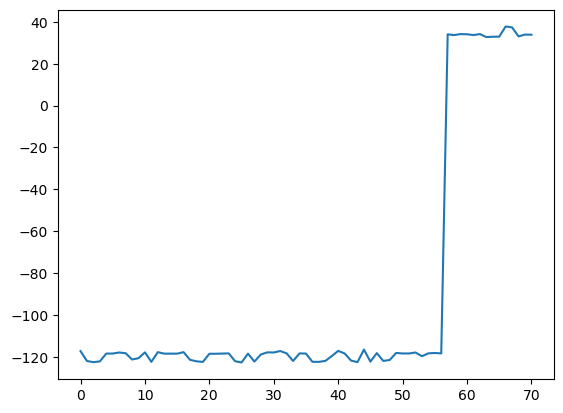

In [45]:
clinic_data['Long'].plot()

<AxesSubplot: >

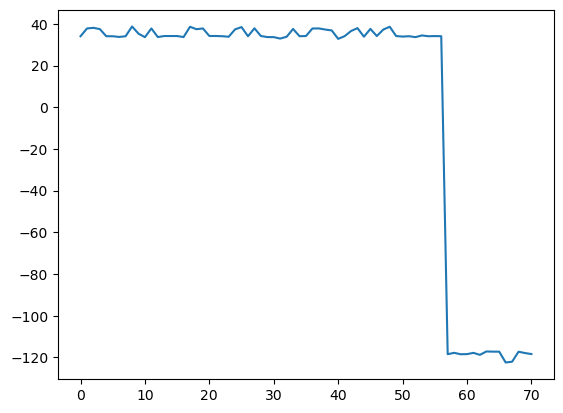

In [47]:
clinic_data[' Lat'].plot()

In [27]:
#Check for data consistency using the groupby() function
clinic_data.groupby('Long').size()
clinic_data.groupby(' Lat').size()

 Lat
-122.422491    1
-122.062431    1
-118.767605    1
-118.472299    1
-118.463076    1
              ..
 38.096916     1
 38.441120     1
 38.597730     1
 38.611820     1
 38.737900     1
Length: 69, dtype: int64

In [35]:
#checking for duplicates
duplicate_rows = clinic_data[clinic_data.duplicated()]
duplicates = clinic_data[clinic_data.duplicated(['Long'])]
print(duplicates)

    ClinicID                                      Address       Long  \
5        399  10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024 -118.44458   
21       559       18370 BURBANK BLVD, TARZANA, CA, 91356 -118.53459   

          Lat  State Code  County Code  Tract Code data_check  
5   34.058598           6           37      265202      Error  
21  34.172188           6           37      139401      Error  


In [41]:
duplicates = clinic_data[clinic_data.duplicated([' Lat'])]
print(duplicates)

    ClinicID                                      Address       Long  \
5        399  10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024 -118.44458   
21       559       18370 BURBANK BLVD, TARZANA, CA, 91356 -118.53459   

          Lat  State Code  County Code  Tract Code  
5   34.058598           6           37      265202  
21  34.172188           6           37      139401  


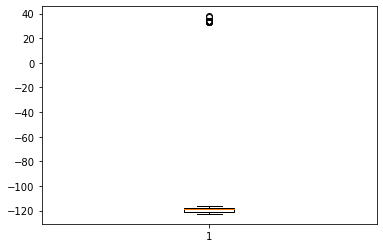

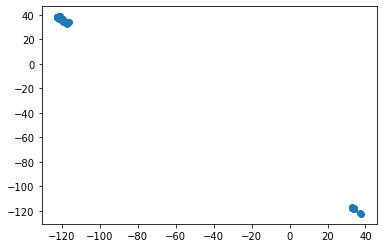

In [22]:
#Checking for outliers within the data

import matplotlib.pyplot as plt

# Box plot of a column
plt.boxplot(clinic_data['Long'])
plt.show()

# Scatter plot of two columns
plt.scatter(clinic_data['Long'], clinic_data[' Lat'])
plt.show()

**From the scatterplot and boxplot above, outliers shows that there are data inconsistency within the dataset**

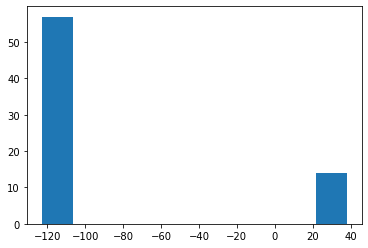

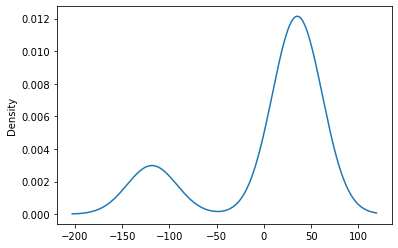

In [23]:
#Check for data distribution using visualization techniques

# Histogram of a column
plt.hist(clinic_data['Long'], bins=10)
plt.show()

# Density plot of a column
clinic_data[' Lat'].plot.kde()
plt.show()

**Checking for data consistency using the apply() function
This will apply a custom function to each row of the DataFrame and give us a new column that contains the result of the function for each row. 
this can be used to check if the data is consistent within each ro**
    

In [24]:
def check_data(row):
    if row[' Lat'] > row['Long']:
        return 'Error'
    else:
        return 'OK'

clinic_data['data_check'] = clinic_data.apply(check_data, axis=1)
print(clinic_data)

    ClinicID                                        Address        Long  \
0        325       11370 ANDERSON ST, LOMA LINDA, CA, 92354 -117.261140   
1        468              100 PARK PL, SAN RAMON, CA, 94583 -121.990890   
2        318             101 ROWLAND WAY, NOVATO, CA, 94945 -122.558784   
3        101           1060 MARSH RD, MENLO PARK, CA, 94025 -122.184875   
4        136    10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024 -118.444580   
..       ...                                            ...         ...   
66       521  1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109   37.786755   
67       524      1195 W. Fremont Ave, PALO ALTO, CA, 94087   37.353110   
68        84    477 N. El Camino Real, ENCINITAS, CA, 92024   33.057114   
69       198              203 N. Brea Blvd, BREA, CA, 92821   33.921864   
70       463  510 N. Prospect Ave, REDONDO BEACH, CA, 90277   33.851956   

           Lat  State Code  County Code  Tract Code data_check  
0    34.047215           6        

# From the above statistical and observational exploration with the dataset we can conclude that there are inconsistency within the dataset that needs to be addressed. Otherwise the analysis could be faulty.